# Segmentos y Churn de Hotel VIP

## Objetivo:

Como dueño de un hotel famoso y con muchas transacciones, registro comercial pendiente a confirmar, deseo saber cuales son mis segmentos de clientes y que segmento es el que tiene mayor perdida porcentual de clientes.


## Datos:

- tlacuachitos_vip_transactions.csv
- tlacuachitos_vip_customers_data.csv

## Actividad 1)
- Elabora y explica segmentos de clientes que podría usar para realizar mi dirección estratégica.

## Actividad 2)
- Calcula y obtén el porcentaje de clientes perdidos que tengo en cada segmento

## Actividad 1)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/tlacuachitos_vip_customers_data.csv')
df.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1143 non-null   int64  
 1   Age                  1143 non-null   int64  
 2   Income               1143 non-null   float64
 3   Tenure               1143 non-null   int64  
 4   Education            1143 non-null   object 
 5   Industry             1143 non-null   object 
 6   Geographic Location  1143 non-null   object 
 7   Churn_Risk           1143 non-null   int64  
 8   Cohort               1143 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 80.5+ KB


In [5]:
numerical_features = ['Age', 'Income', 'Tenure']
categorical_features = ['Education', 'Industry', 'Geographic Location']

In [17]:
encoded_features = pd.get_dummies(df[categorical_features], 
               columns=categorical_features, 
               drop_first=True)
encoded_features

,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,0,0,0,0,1,0,0
1139,0,0,0,0,0,0,0,0,0,0,0
1140,1,0,0,0,1,0,0,0,0,1,0
1141,0,0,0,0,0,1,0,0,0,1,0


In [30]:
data_to_model_standarized = StandardScaler().fit_transform(df[numerical_features])

data_to_model_df = pd.DataFrame(data_to_model_standarized, 
                                columns=numerical_features).reset_index()

encoded_features_df = encoded_features.reset_index()

data_to_model = data_to_model_df.merge(encoded_features_df, on='index')

data_to_model = data_to_model.drop('index', axis=1)

,Age,Income,Tenure,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
0,0.824019,0.121621,-0.878889,0,1,0,0,0,0,1,0,1,0,0
1,1.688471,0.286515,0.451668,0,0,0,0,0,0,1,0,0,0,1
2,0.159056,0.460267,-0.878889,0,0,0,0,1,0,0,0,1,0,0
3,-0.771892,0.620095,-0.878889,1,0,0,0,0,0,0,0,0,0,1
4,1.090004,0.444917,0.008149,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.170870,-0.365427,1.338705,0,0,0,0,0,0,0,0,1,0,0
1139,0.491537,-0.713290,1.782224,0,0,0,0,0,0,0,0,0,0,0
1140,-0.971381,0.399656,0.008149,1,0,0,0,1,0,0,0,0,1,0
1141,0.558034,-1.035115,0.451668,0,0,0,0,0,1,0,0,0,1,0


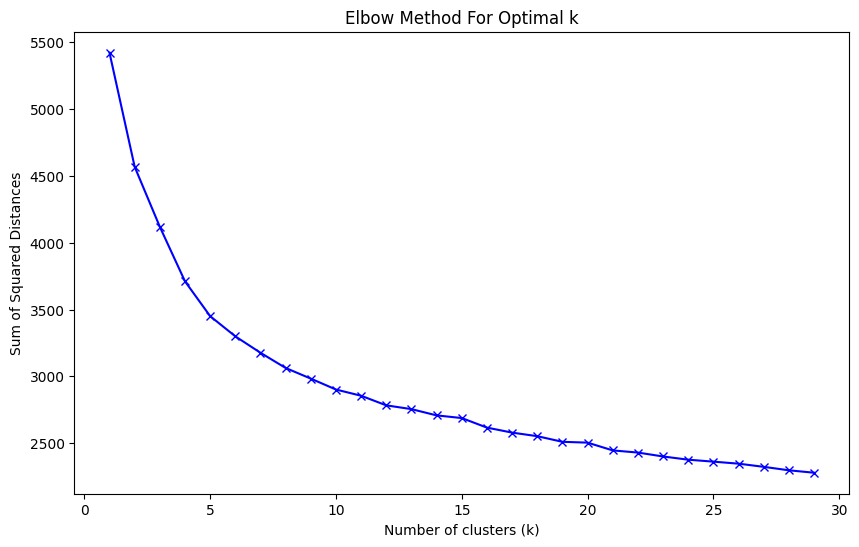

In [32]:
sum_of_squared_distances = []
K = range(1, 30)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(data_to_model)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=5, random_state=42) 
labels = kmeans.fit_predict(data_to_model)
labels

array([4, 4, 4, ..., 1, 3, 3], dtype=int32)

In [35]:
df['cluster'] = labels
df.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,cluster
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31,4
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28,0
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31,4


In [42]:
def boxplot_clusters(col):
    sns.boxplot(x='cluster', y=col, data=df, hue='cluster')
    plt.show()

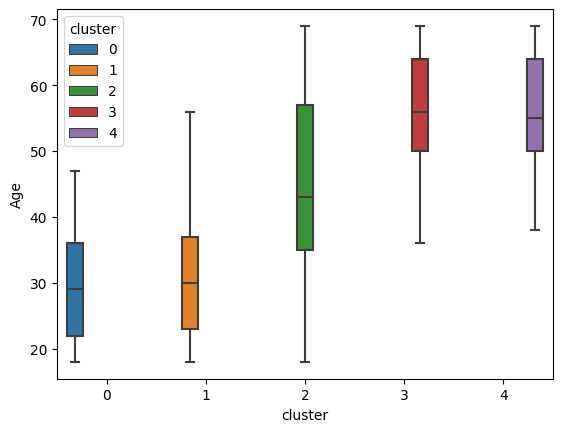

In [43]:
boxplot_clusters('Age')

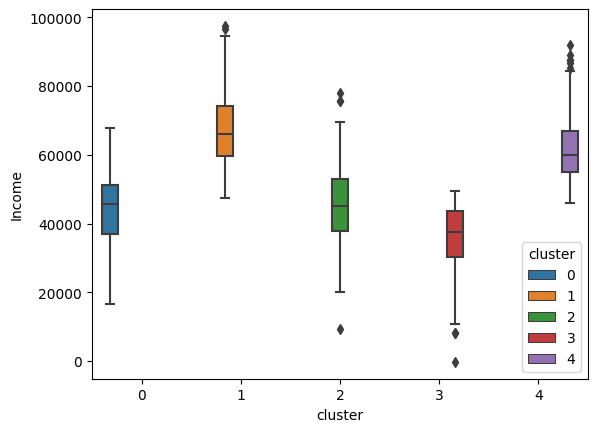

In [44]:
boxplot_clusters('Income')

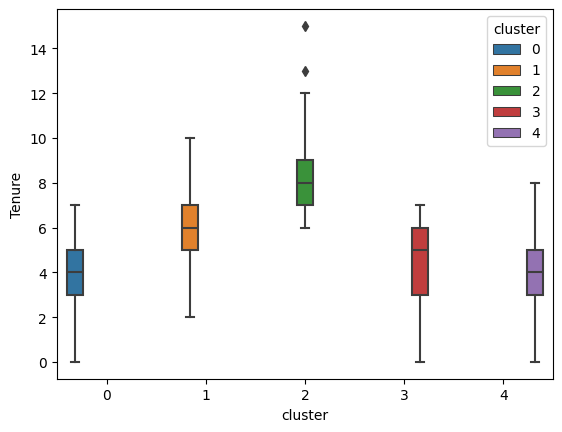

In [45]:
boxplot_clusters('Tenure')

In [57]:
def barplot_clusters(col):
    sns.countplot(x='cluster', hue=col, data=df)
    plt.title('Count of Entries by Geographic Location and Segmento')
    plt.xlabel('Geographic Location')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

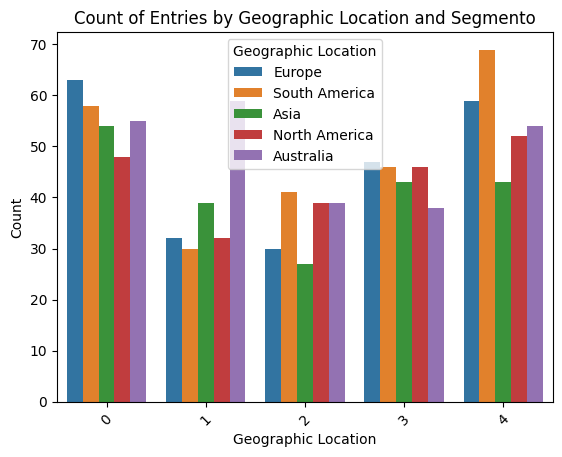

In [58]:
barplot_clusters('Geographic Location')

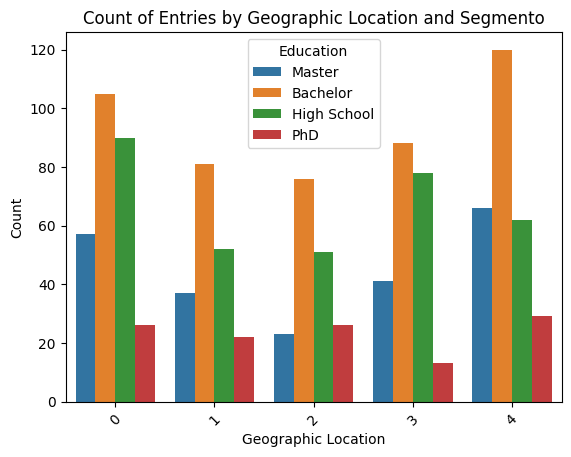

In [59]:
barplot_clusters('Education')

## Actividad 2)

In [66]:
df_transactions = pd.read_csv('data/tlacuachitos_vip_transactions.csv')
df_transactions.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591
3,1,2024-06-30,724.929423
4,2,2022-02-28,145.616000


In [67]:
df['Cohort'] = pd.to_datetime(df['Cohort'])
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'])

In [75]:
df_transactions = df_transactions.sort_values(by=['CustomerID', 'TransactionDate'])
df_master = df_transactions.merge(df[['CustomerID','cluster']], on='CustomerID')

In [90]:
df_master['DaysBetweenPurchase'] = \
df_master.groupby('CustomerID')['TransactionDate'].diff().dt.days
df_master.head()

,CustomerID,TransactionDate,TransactionAmount,cluster,DaysBetweenPurchase
0,1,2023-10-31,518.444092,4,NaN
1,1,2024-01-31,38.206591,4,92.0
2,1,2024-06-30,724.929423,4,151.0
3,1,2024-07-31,353.796197,4,31.0
4,2,2022-02-28,145.616000,4,NaN


In [91]:
df.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,cluster
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31,4
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28,0
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31,4


In [92]:
threshold_per_cluster = df_master.groupby('cluster')['DaysBetweenPurchase'].quantile(0.95).reset_index()
threshold_per_cluster

,cluster,DaysBetweenPurchase
0,0,548.00
1,1,593.00
2,2,510.20
3,3,548.15
4,4,610.00


In [93]:
df_master.merge(threshold_per_cluster,on='cluster')

,CustomerID,TransactionDate,TransactionAmount,cluster,DaysBetweenPurchase_x,DaysBetweenPurchase_y
0,1,2023-10-31,518.444092,4,NaN,610.0
1,1,2024-01-31,38.206591,4,92.0,610.0
2,1,2024-06-30,724.929423,4,151.0,610.0
3,1,2024-07-31,353.796197,4,31.0,610.0
4,2,2022-02-28,145.616000,4,NaN,610.0
...,...,...,...,...,...,...
4341,1141,2018-04-30,384.068906,1,NaN,593.0
4342,1141,2018-05-30,334.479839,1,30.0,593.0
4343,1141,2020-06-30,551.543278,1,762.0,593.0
4344,1141,2020-07-30,536.306642,1,30.0,593.0
